Antes de tudo, esse Notebook acompanha com um artigo no Linkedin, um complementa o outro nas explicações. Aqui você vai colocar a mão na massa. Colocar o Modelo pra rodar treinando o seu Dataset.

É extremamente importante que siga o passo a passo abaixo, pois caso não, ele não vai funcionar.



# Garanta que a máquina rode em GPU

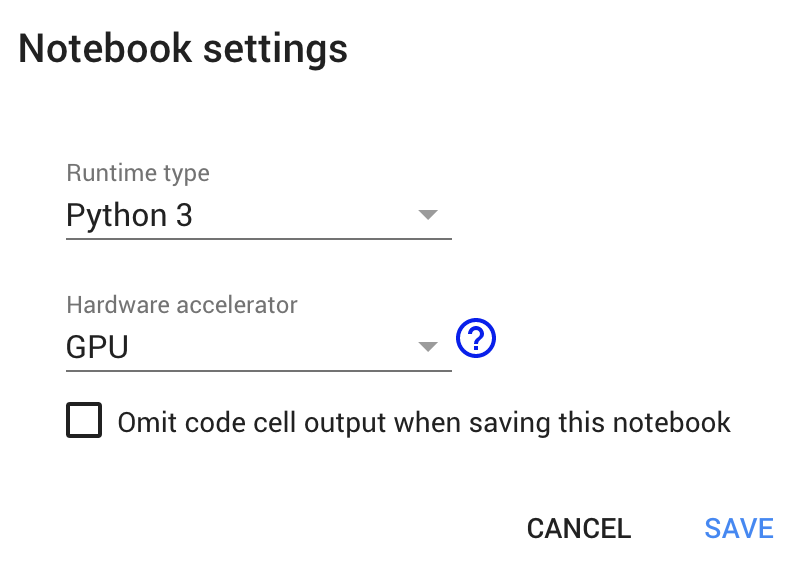

# Checando a GPU que o Colab escolheu

In [ ]:
# Checando o GPU
!nvidia-smi

Feito isso, crie uma pasta no seu Google Drive com o nome **yolov4** para facilitar e nele você segue colocando os seguintes arquivos:


*   obj.zip (onde dentro do arquivo zipado tem uma pasta chamada **obj** com os txt gerados do MakeSense.AI e imagens(.jpg) para a identificação dos objetos).
*   process.py ([link para baixar](https://github.com/keziacamposcs/TreinandocomYOLOeAplicando))
*   yolov4-custom.cfg ([link para baixar](https://github.com/keziacamposcs/TreinandocomYOLOeAplicando))
*   obj.names
*   obj.data
* Qualquer imagem de teste (.jpg) para você visualizar o resultado no final desse Notebook (nomeia a imagem como "teste.jpg" para isso.






Esses arquivos colocandos na pasta **yolov4**, vão precisar ser alterados de acordo com os objetos que você vai identificar e a quantidade de objetos que você vai identificar. Segue abaixo:

### Em **yolov4-custom.cfg**

* altera linha **batch** para **batch=64**
* altera linha **subdivisions** para **subdivisions=16**
* altera linha **max_batches** para (classes*2000 mas não menos que o número de imagens de treinamento e não menos que 6000).
EX: max_batches=6000 se você treina 3 classes
* alterar as etapas da linha para 80% e 90% de **max_batches**, EX: **steps=4800,5400** se for 3 classes
* definir o tamanho da rede **width=416** e **height=416** ou qualquer valor múltiplo de 32
* altera linha **classes=80** ao seu número de objetos em cada um das 3 camadas [yolo]
* altera [filters=255] para **filters=(classes + 5)* 3** nos 3 [convolutional] antes de cada camada [yolo], tenha em mente que só tem que ser o último [convolutional] antes de cada um das camadas [yolo]. Portanto, se classes = 1, deve ser filtros = 18. Se classes = 2, escreva filtros = 21.

---
Caso você vá treinar apenas 2 classes, o arquivo cfg, já está preparado para isso. Altere conforme acima caso você não treine apenas 2 classes.

### Em **obj.data** altera conforme abaixo (classes é conforme a quantidade de suas classes/objetos):

classes = 2

train  = data/train.txt

valid  = data/test.txt

names = data/obj.names

backup = /mydrive/yolov4/training

### Em **obj.names** você precisa colocar o nome de cada objeto que vai ser identificado em cada linha


# Monte a unidade, vincule sua pasta e navegue até a pasta:
**mydrive / yolov4**

In [ ]:

#montando o drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# link do drive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# listando os conteudos do drive
!ls /mydrive

#navegar para a pasta "YOLOV4" /mydrive/yolov4
%cd /mydrive/yolov4

# Clonar repositório git Darknet:

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15150, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 15150 (delta 39), reused 51 (delta 21), pack-reused 15073
Receiving objects: 100% (15150/15150), 13.50 MiB | 7.46 MiB/s, done.
Resolving deltas: 100% (10285/10285), done.
Checking out files: 100% (2036/2036), done.


# Faça alterações no `makefile` para habilitar OPENCV e GPU





In [ ]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

# Monte o Darknet

In [ ]:
!make

#Copie todos os arquivos da pasta yolov4 para o diretório darknet


In [ ]:
# Aqui vai limpar todos os dados (data) desse modelo que já vem pre-configurado e adicionar os modelos customizados

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

In [ ]:
# Descompactar obj.zip dataset e seu conteudo para /darknet/data/  

!unzip /mydrive/yolov4/obj.zip -d data/

In [ ]:
# Copiar yolov4-custom.cfg para /darknet/cfg/ 

#Atenção ----> As configurações devem ser alteradas para rodar de acordo com o seu dataset conforme a documentação do Yolo 

!cp /mydrive/yolov4/yolov4-custom.cfg cfg

# verifica a configuração customizada
!ls cfg/

In [ ]:
# Copia os obj.names e obj.data para a pasta de dados /darknet/data/  

!cp /mydrive/yolov4/obj.names data
!cp /mydrive/yolov4/obj.data  data

# verifica se foi copiado
!ls data/

In [ ]:
# Copia o process.py para a pasta

!cp /mydrive/yolov4/process.py .

# Execute o script  `process.py` python para criar os arquivos ` train.txt` e  `test.txt`  dentro da pasta data 

In [ ]:
# roda process.py 
!python process.py

# lista os conteudos para ver se foi criado o test.txt e train.txt
!ls data/

# Download modelo pre-treinado dos pesos/weights `yolov4`

In [ ]:
# Download os pesos/weights pre-treinados do darknet YOLOv4

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# Treina o modelo com seus dados selecionados

Layer 137 do Yolov4

In [ ]:
# treina com as informações customizadas

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map



---

# Checa a perfomance do Yolo

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

### O comando abaixo vai apresentar um gráfico gerando assim uma imagem após com o seu erro diminuindo confome o tempo de treinamento

In [ ]:
imShow('chart.png')

In [ ]:
#percentual do modelo treinado
#para visualizar quantos registros o algoritmo treinou corretamente e quantos errou


!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_3000.weights -points 0



---



---
# Testando a perfomance da rede neural treinada em uma imagem.


In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_last.weights /mydrive/yolov4/teste.jpg -thresh 0.3 
imShow('predictions.jpg')



---

***Créditos: Conteúdo do Tech Zizou traduzido para Português e IAExpert Academy.***